# Homework 2

Oscar Sjöstrand

### Apartment Prices

#### Q1

In [102]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
df = pd.read_csv("Booli_sold.csv")

In [103]:
"Extract the columns"
price = df["soldPrice"]
sq_m = df["livingArea"]
"Calculation"
ppsqm = list_price/sq_m

In [104]:
"Add price_per_sq to the df"
df["ppsqm"] = ppsqm

#### Q2

In [105]:
five_most_expensive = df.sort_values(by="ppsqm", ascending=False)[:5]
five_most_expensive

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url,ppsqm
10,2295000,1743.0,29.0,1.0,2018-05-05 04:43:36,1935.0,Lägenhet,3125674,2018-05-19,2420000,...,18.054986,True,Stockholm,Stockholms län,136,Mäklarhuset,204,Broker,http://www.maklarhuset.se/,79137.931034
50,1890000,1464.0,24.0,1.0,2016-06-11 08:55:51,1935.0,Lägenhet,2125576,2016-06-21,2450000,...,18.055270,NaN,Stockholm,Stockholms län,161,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,78750.000000
54,1795000,1374.0,23.0,1.0,2016-04-15 19:10:49,1935.0,Lägenhet,2078171,2016-04-28,2300000,...,18.055422,True,Stockholm,Stockholms län,135,Notar,1566,Broker,http://www.notar.se/,78043.478261
49,3495000,3052.0,47.0,2.0,2016-07-31 06:06:54,NaN,Lägenhet,2145197,2016-08-15,3375000,...,18.053174,True,Stockholm,Stockholms län,171,Notar,1566,Broker,http://www.notar.se/,74361.702128
24,2500000,1400.0,35.0,1.0,2017-09-08 15:22:24,1936.0,Lägenhet,2405043,2017-10-06,2560000,...,18.053880,NaN,Stockholm,Stockholms län,218,HusmanHagberg,1610,Broker,http://www.husmanhagberg.se/,71428.571429


We see that the apparpmets with the highest price per square meter is 10, 50, 54, 49 and 24.

In [106]:
mean_ppsqm = np.mean(ppsqm)
mean_ppsqm

54127.43692133397

Using the mean() function from numpy we see that the avrage ppsqm is about 54130 kr (asumtion on kr).

#### Q4

<BarContainer object of 158 artists>

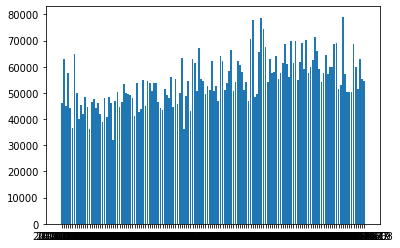

In [107]:
import matplotlib.pyplot as plt
df = df.sort_values(by="soldDate")
plt.bar(df["soldDate"], df["ppsqm"])

## The Swedish Election of 2018

#### Q1

In [108]:
df = pd.read_csv("2018_R_per_kommun.csv", sep=";")
print(df)

     LÄNSKOD  KOMMUNKOD         LÄNSNAMN      KOMMUNNAMN      M      C     L  \
0          1         14   Stockholms län  Upplands Väsby  23,11   6,26  5,66   
1          1         15   Stockholms län      Vallentuna  28,29  10,11  7,73   
2          1         17   Stockholms län       Österåker  29,68   9,35  7,48   
3          1         20   Stockholms län          Värmdö  27,49   9,76   6,4   
4          1         23   Stockholms län        Järfälla  23,96   6,31  6,04   
..       ...        ...              ...             ...    ...    ...   ...   
285       25         80  Norrbottens län           Luleå  15,38   7,53  4,37   
286       25         81  Norrbottens län           Piteå  11,82   7,49  2,52   
287       25         82  Norrbottens län           Boden  14,32   6,23  3,61   
288       25         83  Norrbottens län       Haparanda  12,79   9,61  1,86   
289       25         84  Norrbottens län          Kiruna  10,71   5,38  2,51   

       KD      S      V  ...  TRP  VL-S

In [109]:
sum = np.sum(df["RÖSTER GILTIGA"])
sum

6476725

We use the sum() function in numpy to sum over the column "RÖSTER GILTIGA" to fint that the total number of legitimate votes are 6 476 725

#### Q2

In [110]:
# Replace the , with . and transforming into float values
Clean_S = []
for i in df["S"].copy():
    i = float(i.replace(",", "."))
    Clean_S.append(i)
df["S"] = Clean_S

In [111]:
# Find the kommun with the higest S voting percentage
most_S = df.sort_values(by="S", ascending=False)[:1]
most_S

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
188,17,62,Värmlands län,Munkfors,"8,33","8,12","2,91","3,93",52.18,"6,11",...,NaN,NaN,NaN,NaN,"1,02",NaN,2340,2364,2777,"85,13"


We see that Munkfors were the kommun with the highest percentage of S voters namely 52.18%

#### Q3

In [112]:
Clean_VAL = []
for i in df["VALDELTAGANDE"].copy():
    i = float(i.replace(",", "."))
    Clean_VAL.append(i)
df["VALDELTAGANDE"] = Clean_VAL

In [113]:
df = df.sort_values(by="VALDELTAGANDE")
df[:5]

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
288,25,83,Norrbottens län,Haparanda,"12,79","9,61","1,86","5,32",36.69,"5,91",...,NaN,NaN,NaN,"0,04","1,01","0,11",4402,4454,6120,72.78
17,1,81,Stockholms län,Södertälje,"19,81","5,86","4,45","11,17",27.18,"7,7",...,NaN,NaN,0,"0,03","0,76","0,06",48273,48684,62783,77.54
7,1,27,Stockholms län,Botkyrka,"18,52","5,19","4,39","8,13",32.34,"9,85",...,NaN,NaN,"0,06","0,03","0,64","0,05",45393,45719,58436,78.24
97,12,31,Skåne län,Burlöv,"19,35","5,03","4,73","3,55",32.41,"6,23",...,"0,03",NaN,NaN,"0,02","0,85","0,07",10010,10105,12513,80.76
268,24,22,Västerbottens län,Sorsele,"10,96","12,22","1,92","6,94",35.67,"12,75",...,NaN,NaN,NaN,"0,13","2,38",NaN,1514,1553,1922,80.80


## Predicting Strokes

In [114]:
df = pd.read_csv("stroke-data.csv")

Text(0, 0.5, 'Strokes')

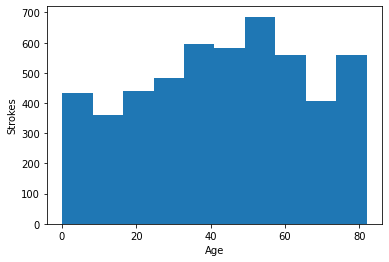

In [115]:
plt.hist(df["age"])
plt.xlabel("Age")
plt.ylabel("Strokes")

We see that as people get older the frequence of strokes also get higher. We draw this conclusion by looking at the plot above.